In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pickle
%matplotlib inline

In [12]:
with open("../comments/df_all_comments_parsed.pickle", "rb") as f:
    df_all = pickle.load(f)

In [13]:
len(df_all)

1843935

In [14]:
df_all_ns0 = df_all.query("page_namespace == 0")

In [45]:
counts_bottype_dict = {}
for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_dict[lang]=pd.concat([type_counts, type_percent], axis=1)
    
counts_bottype_group_dict = {}
for lang in df_all_ns0['language'].unique():

    df_lang_ns0 = df_all_ns0[df_all_ns0['language']==lang]
    
    type_counts = df_lang_ns0['bottype_group'].value_counts().rename("count")
    type_percent = df_lang_ns0['bottype_group'].value_counts(normalize=True).rename("percent") * 100
    type_percent = type_percent.round(2).astype(str) + "%"

    counts_bottype_group_dict[lang]=pd.concat([type_counts, type_percent], axis=1)

In [46]:
counts_bottype_group_dict['en']

,count,percent
interwiki link cleanup,242440,49.6%
fixing double redirect,220172,45.04%
category work,7496,1.53%
protection template cleanup,5674,1.16%
not classified,4530,0.93%
other classified,2506,0.51%
template work,2366,0.48%
other w/ revert in comment,2014,0.41%
botfight,1598,0.33%


In [33]:
gb_lang_bottype = df_all_ns0.groupby(["language", "bottype"])['revisions_reverted']
gb_lang_bottype_group = df_all_ns0.groupby(["language", "bottype_group"])['revisions_reverted']

In [37]:
gb_lang_bottype.sum().unstack().transpose().replace(np.nan,0)

language,de,en,es,fr,ja,pt,zh
bottype,,,,,,,
botfight: 718bot vs ImageRemovalBot,8.0,362.0,0.0,0.0,0.0,0.0,0.0
botfight: Cyberbot II vs AnomieBOT date tagging,0.0,1238.0,0.0,0.0,0.0,0.0,0.0
botfight: infoboxneeded,0.0,210.0,0.0,0.0,0.0,0.0,0.0
botfight: reverting CommonsDelinker,10.0,460.0,44.0,8.0,0.0,2.0,6.0
category redirect cleanup,10.0,3166.0,212.0,0.0,0.0,0.0,0.0
clearing sandbox,0.0,2.0,2.0,4.0,0.0,2.0,0.0
commons image migration,0.0,6.0,0.0,0.0,0.0,0.0,0.0
fixing double redirect,2228.0,258060.0,21300.0,7436.0,644.0,4062.0,8240.0
has per justification,22.0,998.0,318.0,820.0,18.0,74.0,12.0


In [70]:
gb_lang_bottype_group.sum().unstack().transpose().replace(np.nan,0).sort_values(by='en', ascending=False)

language,de,en,es,fr,ja,pt,zh
bottype_group,,,,,,,
interwiki link cleanup,129904.0,330214.0,134594.0,123300.0,76118.0,137892.0,106590.0
fixing double redirect,2228.0,258060.0,21300.0,7436.0,644.0,4062.0,8240.0
category work,54.0,8806.0,212.0,538.0,0.0,0.0,0.0
protection template cleanup,12.0,7200.0,0.0,0.0,0.0,0.0,0.0
not classified,3082.0,6144.0,9866.0,2710.0,2106.0,3294.0,784.0
other classified,22.0,4096.0,320.0,824.0,18.0,76.0,12.0
template work,18.0,3060.0,270.0,0.0,0.0,0.0,0.0
other w/ revert in comment,48.0,2360.0,2230.0,26.0,24.0,98.0,942.0
botfight,18.0,2270.0,44.0,8.0,0.0,2.0,6.0


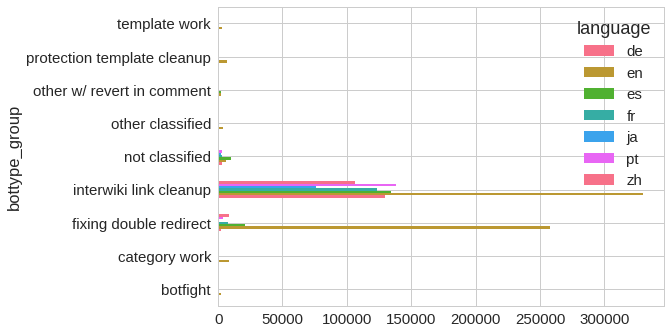

In [36]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_palette("husl")
gb.sum().unstack().transpose().plot(kind='barh')

## Classified time to revert

In [51]:
df_all['time_to_revert_days_log10'] = df_all['time_to_revert_days'].apply(np.log10)
df_all['time_to_revert_hrs_log10'] = df_all['time_to_revert_hrs'].apply(np.log10)

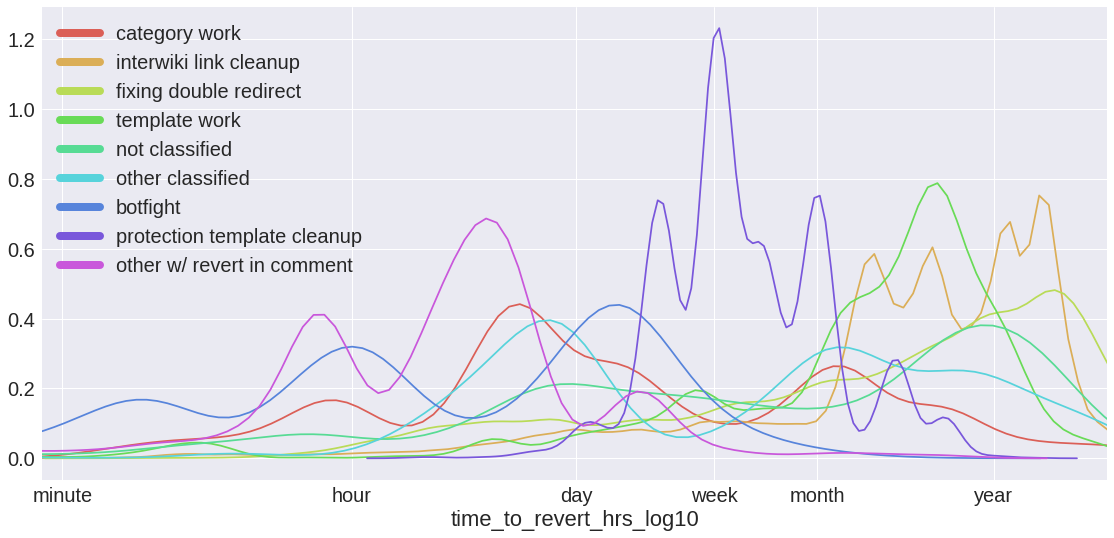

In [54]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0 and language == 'en'"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])

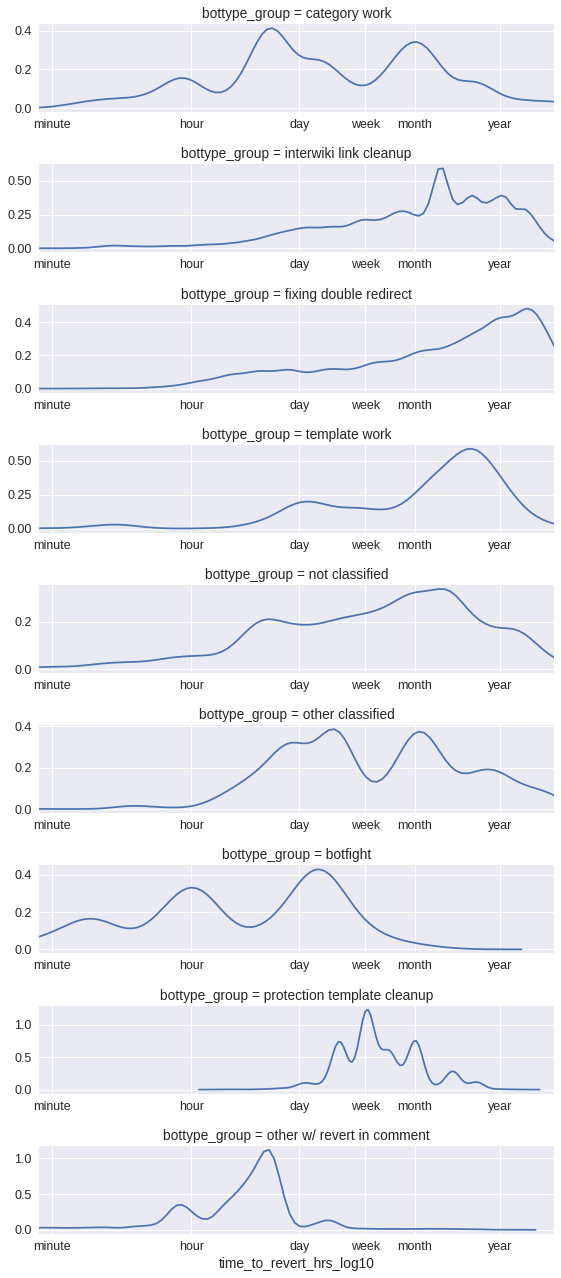

In [68]:
sns.set(font_scale=1.25)
pal = sns.color_palette("husl", 7)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, row="bottype_group", size=2, aspect=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")

xticks = [np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)]
xticklabels = ["minute", "hour", "day", "week", "month", "year"]

for ax in g.axes.flatten():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_xlim(np.log10(1/90), np.log10(24*365*5))

In [ ]:
sns.set(font_scale=2)
pal = sns.color_palette("hls", 10)
g = sns.FacetGrid(df_all.query("page_namespace == 0"),
                  palette=pal, hue="bottype_group", size=8, aspect=2)
g.map(sns.kdeplot, "time_to_revert_hrs_log10")
#g.add_legend()
leg = plt.legend()
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

g.ax.set_xlim([np.log10(1/90), np.log10(24*365*5)])
    
g.ax.set_xticks([np.log10(1/60),np.log10(1), np.log10(24), np.log10(24*7), np.log10(24*30), np.log10(24*365)])
g.ax.set_xticklabels(["minute", "hour", "day", "week", "month", "year"])